In [ ]:
"""
로지스틱 회귀(logistic regression)
- 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에
  속하는 것으로 분류하는 이진 분류 모델
  
추천시스템
"""

In [9]:
import pandas as pd
import numpy as np

In [10]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [13]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [14]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [16]:
df1.rename(columns={'movie_id':'id'},inplace=True)

In [17]:
df= df1.merge(df2, on='id',how='left')

In [18]:
df

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [20]:
c=df['vote_average'].mean()
c

6.092171559442016

In [22]:
m = df['vote_count'].quantile(0.9)
m #영화 차트에 실리기 위한 최소 투표수

1838.4000000000015

In [29]:
q_movies=df.loc[df['vote_count']>=m]

In [30]:
q_movies.shape

(481, 23)

In [31]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * c)

In [32]:
q_movies

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,176,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184
4300,500,Reservoir Dogs,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de...",1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every dog has his day.,Reservoir Dogs,8.0,3697
4302,429,"The Good, the Bad and the Ugly","[

In [33]:
#for문 보다는 apply권장 속도차이..
q_movies['score']=q_movies.apply(weighted_rating, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_8732\2961758182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score']=q_movies.apply(weighted_rating, axis=1)


In [34]:
q_movies.head(1)

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,score
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.050669


In [35]:
q_movies=q_movies.sort_values('score', ascending=False)

In [36]:
q_movies

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,score
1881,278,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,...,1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,8.059258
662,550,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,...,1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,7.939256
65,155,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,...,2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,7.920020
3232,680,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,...,1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,7.904645
96,27205,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,...,2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,44912,Green Lantern,"[{""cast_id"": 6, ""character"": ""Hal Jordan / Gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,...,2011-06-16,219851172,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,5.521697
337,47964,A Good Day to Die Hard,"[{""cast_id"": 1, ""character"": ""John McClane"", ""...","[{""credit_id"": ""5336b04a9251417db4000c80"", ""de...",92000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.diehardmovie.com/,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 591, ""nam...",en,A Good Day to Die Hard,...,2013-02-06,304654182,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Yippee Ki-Yay Mother Russia,A Good Day to Die Hard,5.2,3493,5.507643
193,82700,After Earth,"[{""cast_id"": 11, ""character"": ""Kitai Raige"", ""...","[{""credit_id"": ""52fe486f9251416c9108c631"", ""de...",130000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 4565, ""name"": ""dystopia""}]",en,After Earth,...,2013-05-30,243843127,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English"

In [37]:
df

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",0

In [39]:
pop = df.sort_values('popularity', ascending=False)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
tfidf=TfidfVectorizer(stop_words='english')

In [43]:
df['overview']=df['overview'].fillna("")

In [44]:
df['overview'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [46]:
tfidf_mat=tfidf.fit_transform(df['overview'])

In [48]:
tfidf_mat.shape

(4803, 20978)

In [ ]:
# tfidf_mat=tf(dtm) * idf

In [49]:
from sklearn.metrics.pairwise import linear_kernel

In [50]:
cos_sim=linear_kernel(tfidf_mat, tfidf_mat)

In [51]:
cos_sim.shape

(4803, 4803)

In [53]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [56]:
# df.index
df['title_x']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [58]:
indices=pd.Series(df.index, index=df['title_x'])

In [59]:
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [193]:
def get_recommendations(title, cosine_sim=cos_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    return sim_scores

In [194]:
get_recommendations("The Avengers")

[(16, 1.0000000000000002),
 (7, 0.1463743318256992),
 (3144, 0.12279141010343961),
 (1715, 0.11038518674285192),
 (4124, 0.10752921414824139),
 (3311, 0.10620265000347046),
 (3033, 0.09759828413959508),
 (588, 0.0940835912253675),
 (2136, 0.09224358087040964),
 (1468, 0.0866431880033664),
 (1286, 0.0861887692660884),
 (256, 0.08452641807086986),
 (1197, 0.08356998060182787),
 (1161, 0.08356446629953834),
 (2433, 0.08210423390580601),
 (2646, 0.08108535329934477),
 (227, 0.07894631397382865),
 (2097, 0.07886433498317331),
 (602, 0.07883880001915194),
 (4620, 0.07824637717767405),
 (290, 0.07794155330536612),
 (245, 0.07770305267908868),
 (2194, 0.07707480890844756),
 (3505, 0.07705564852371678),
 (370, 0.07699177613999039),
 (1234, 0.07696999194609744),
 (2282, 0.07585388836864121),
 (1892, 0.07550038107398466),
 (580, 0.07538209564034086),
 (1704, 0.07512308736129217),
 (171, 0.07405232498828608),
 (4268, 0.07402324033194656),
 (941, 0.07347667459943623),
 (215, 0.07323289007726135),
 

In [70]:
def get_recommendations(title, cosine_sim=cos_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    #print(sim_scores)
    sim_scores=sim_scores[1:11]
    m_indices=[i[0] for i in sim_scores]
    return df['title_x'].iloc[m_indices]

In [71]:
get_recommendations("The Avengers")

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [75]:
from ast import literal_eval

In [ ]:
# for f in ['cast','crew','keywords','genres']:
#     df[f] = df[f].apply(literal_eval)

In [73]:
#df[['cast','crew','keywords','genres']]

for f in ['cast','crew','keywords','genres']:
    df[f] = df[f].apply(eval)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4803 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [78]:
def getDirector(data):
    for i in data:
        if i['job']=='Director':
            return i['name']
    return np.nan

In [79]:
# df['crew']에서 job이 Director에 해당되는 사람의 이름을 출력
df['director']=df['crew'].apply(getDirector)

In [80]:
df.head()

,id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count,director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Andrew Stanton


In [ ]:
#선형대수
#pca? 데이터의 공분산 행렬 -> 고유값 분해 -> 고유벡터의 데이터를 선형변환
# 고유벡터 : pca의 주성분벡터, 입력데이터의 분산이 가장 큰 방향
# 고유값: 고유벡터의 크기, 데이터의 분산

# 과정
# 1. 원본 데이터의 공분산 행렬
# 2. 공분산 행렬의 고유값과 고유벡터를 구함
# 3. 고유값이 가장 큰 고유벡터를 추출(축소하고자 하는 차원의 수만큼)
# 4. 고유값이 가장 큰 고유벡터를 이용하여 원본 데이터를 변환한다(차원 축소한다)

In [81]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
import matplotlib.pyplot as plt

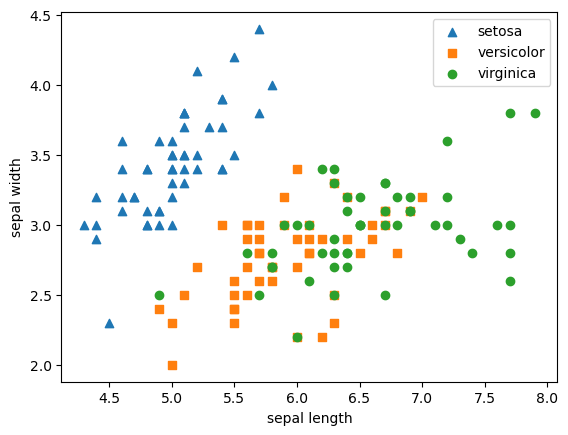

In [83]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [84]:
from sklearn.preprocessing import StandardScaler

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [85]:
iris_f_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
# 4차원 -> 2차원으로 차원축소

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca=PCA(n_components=2)

In [88]:
pca.fit(iris_f_scaled)

PCA(n_components=2)

In [89]:
iris_pca=pca.transform(iris_f_scaled)

In [91]:
iris_pca.shape

(150, 2)

In [92]:
iris_f_scaled.shape

(150, 4)

In [97]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [94]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [95]:
iris_f_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [96]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [98]:
pca_columns=['pca_component_1','pca_component_2']

In [99]:
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

In [100]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


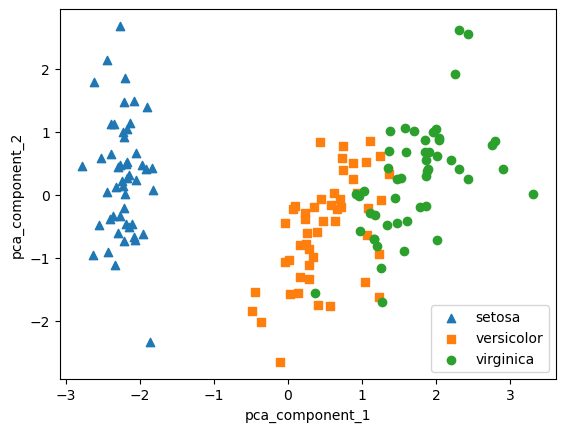

In [101]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [102]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"pca 데이터 fold별 정확도: {scores}")
print(f"pca 데이터 평균 정확도: {np.mean(scores):.4f}")

pca 데이터 fold별 정확도: [0.88 0.88 0.88]
pca 데이터 평균 정확도: 0.8800


In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:2], iris_df.target, scoring = "accuracy", cv = 3)

print(f"sepal_width, sepal length 데이터 fold별 정확도: {scores}")
print(f"sepal_width, sepal length 데이터 평균 정확도: {np.mean(scores):.4f}")

sepal_width, sepal length 데이터 fold별 정확도: [0.72 0.76 0.68]
sepal_width, sepal length 데이터 평균 정확도: 0.7200


In [106]:
iris_df.iloc[:, :2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [107]:
pip install scikit-surprise

     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     ------------------------ ------------ 501.8/772.0 kB 15.4 MB/s eta 0:00:01
     ------------------------------------- 772.0/772.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [101 lines of output]
  C:\Users\user\AppData\Local\Temp\pip-install-ub3o4yls\scikit-surprise_da9b19cafceb4567bedd4cab3a5a1cf9\setup.py:65: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.Distribution().fetch_build_eggs(["numpy>=1.17.3"])
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\bui

In [116]:
import surprise

In [117]:
from surprise import Dataset
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [118]:
import numpy as np
import pandas as pd
import random

from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV

In [119]:
np.random.seed(20231030)

In [120]:
ratings_data=pd.read_csv("ratings.csv")

In [121]:
ratings_data

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [123]:
len(set(ratings_data['book_id']))

10000

In [124]:
len(set(ratings_data['user_id']))

53424

In [125]:
reader = Reader(rating_scale=(1, 5))

In [129]:
ratings_data
data = Dataset.load_from_df(ratings_data[['user_id','book_id','rating']], reader)

In [130]:
data

In [132]:
raw_ratings=data.raw_ratings
raw_ratings

[(314, 1, 5.0, None),
 (439, 1, 3.0, None),
 (588, 1, 5.0, None),
 (1169, 1, 4.0, None),
 (1185, 1, 4.0, None),
 (2077, 1, 4.0, None),
 (2487, 1, 4.0, None),
 (2900, 1, 5.0, None),
 (3662, 1, 4.0, None),
 (3922, 1, 5.0, None),
 (5379, 1, 5.0, None),
 (5461, 1, 3.0, None),
 (5885, 1, 5.0, None),
 (6630, 1, 5.0, None),
 (7563, 1, 3.0, None),
 (9246, 1, 1.0, None),
 (10140, 1, 4.0, None),
 (10146, 1, 5.0, None),
 (10246, 1, 4.0, None),
 (10335, 1, 4.0, None),
 (10610, 1, 5.0, None),
 (10944, 1, 5.0, None),
 (11854, 1, 4.0, None),
 (11927, 1, 4.0, None),
 (12471, 1, 5.0, None),
 (13282, 1, 5.0, None),
 (13544, 1, 5.0, None),
 (15494, 1, 5.0, None),
 (16377, 1, 4.0, None),
 (16913, 1, 5.0, None),
 (17434, 1, 5.0, None),
 (17663, 1, 5.0, None),
 (17984, 1, 5.0, None),
 (18031, 1, 5.0, None),
 (18313, 1, 5.0, None),
 (18361, 1, 4.0, None),
 (20076, 1, 3.0, None),
 (20467, 1, 3.0, None),
 (20848, 1, 5.0, None),
 (21228, 1, 5.0, None),
 (21487, 1, 4.0, None),
 (21713, 1, 5.0, None),
 (22602, 1,

In [133]:
len(raw_ratings)

981756

In [134]:
random.shuffle(raw_ratings)

In [135]:
raw_ratings

[(7623, 3715, 4.0, None),
 (3438, 7005, 5.0, None),
 (21867, 1756, 5.0, None),
 (25167, 4896, 2.0, None),
 (13993, 4682, 2.0, None),
 (43622, 1108, 5.0, None),
 (38446, 2970, 4.0, None),
 (42191, 3057, 5.0, None),
 (11076, 2507, 5.0, None),
 (16637, 5349, 3.0, None),
 (28559, 4391, 3.0, None),
 (28050, 3556, 2.0, None),
 (21618, 6262, 4.0, None),
 (19647, 3373, 3.0, None),
 (45404, 8164, 4.0, None),
 (24617, 6825, 5.0, None),
 (14390, 6090, 5.0, None),
 (25168, 9900, 5.0, None),
 (45679, 7087, 3.0, None),
 (35064, 2986, 5.0, None),
 (4573, 6387, 3.0, None),
 (16306, 8660, 5.0, None),
 (17666, 8909, 3.0, None),
 (681, 7028, 4.0, None),
 (13877, 7631, 5.0, None),
 (7691, 5616, 4.0, None),
 (50416, 3391, 3.0, None),
 (41621, 7221, 2.0, None),
 (41747, 1381, 4.0, None),
 (26489, 4698, 3.0, None),
 (25656, 5908, 2.0, None),
 (52500, 5488, 5.0, None),
 (28737, 2438, 5.0, None),
 (50119, 5426, 5.0, None),
 (16251, 3798, 3.0, None),
 (12223, 3109, 4.0, None),
 (17835, 1939, 3.0, None),
 (28617

In [138]:
int(0.9*len(raw_ratings))

883580

In [139]:
train_test_split_index = int(0.9 * len(raw_ratings))

In [140]:
raw_ratings_train = raw_ratings[:train_test_split_index]
raw_ratings_test = raw_ratings[train_test_split_index:]

In [142]:
len(raw_ratings_train)

883580

In [143]:
len(raw_ratings_test)

98176

In [146]:
raw_ratings_train

[(7623, 3715, 4.0, None),
 (3438, 7005, 5.0, None),
 (21867, 1756, 5.0, None),
 (25167, 4896, 2.0, None),
 (13993, 4682, 2.0, None),
 (43622, 1108, 5.0, None),
 (38446, 2970, 4.0, None),
 (42191, 3057, 5.0, None),
 (11076, 2507, 5.0, None),
 (16637, 5349, 3.0, None),
 (28559, 4391, 3.0, None),
 (28050, 3556, 2.0, None),
 (21618, 6262, 4.0, None),
 (19647, 3373, 3.0, None),
 (45404, 8164, 4.0, None),
 (24617, 6825, 5.0, None),
 (14390, 6090, 5.0, None),
 (25168, 9900, 5.0, None),
 (45679, 7087, 3.0, None),
 (35064, 2986, 5.0, None),
 (4573, 6387, 3.0, None),
 (16306, 8660, 5.0, None),
 (17666, 8909, 3.0, None),
 (681, 7028, 4.0, None),
 (13877, 7631, 5.0, None),
 (7691, 5616, 4.0, None),
 (50416, 3391, 3.0, None),
 (41621, 7221, 2.0, None),
 (41747, 1381, 4.0, None),
 (26489, 4698, 3.0, None),
 (25656, 5908, 2.0, None),
 (52500, 5488, 5.0, None),
 (28737, 2438, 5.0, None),
 (50119, 5426, 5.0, None),
 (16251, 3798, 3.0, None),
 (12223, 3109, 4.0, None),
 (17835, 1939, 3.0, None),
 (28617

In [ ]:
raw_ratings_train

In [ ]:
# data 변수에 담긴 트레인 데이터로 훈련

In [147]:
data.raw_ratings = raw_ratings_train

In [ ]:
#test데이터셋 구성

In [149]:
test=data.construct_testset(raw_ratings_test)

In [162]:
param_grid = {
    "n_factors": [75, 55],
    "n_epochs": [20, 30], 
    "lr_all": [0.005, 0.025, 0.125],
    "reg_all": [0.08, 0.16, 0.32],  
    "random_state": [0],
}

In [161]:
grid_search.best_params

{'rmse': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0},
 'mae': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.08,
  'random_state': 0}}

In [163]:
grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

In [164]:
grid_search.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.6min finished


In [154]:
best_model=grid_search.best_estimator['rmse']

In [156]:
best_model.predict(uid=10, iid=1000) #uid=10번 아이디를 가진사람, iid=1000 책번호

Prediction(uid=10, iid=1000, r_ui=None, est=3.7767631738351306, details={'was_impossible': False})

In [165]:
testset_predictions = best_model.test(test)
accuracy.rmse(testset_predictions)

RMSE: 0.8256


0.8255832040417546

In [160]:
testset_predictions
# uid 사용자 id
# iid 아이템 id
# r_ui 실제 평점
# est 예측점수

[Prediction(uid='120', iid='282', r_ui=4.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='219', iid='82', r_ui=1.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='279', iid='571', r_ui=4.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='429', iid='568', r_ui=3.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='456', iid='100', r_ui=3.0, est=3.8562846601326424, details={'was_impossible': False}),
 Prediction(uid='249', iid='23', r_ui=4.0, est=3.8562846601326424

In [166]:
data = Dataset.load_builtin('ml-100k') #무비렌즈

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [167]:
data.raw_ratings[:10]# 사용자id, 상품id, 평점, 시간

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [169]:
len(data.raw_ratings[:])#100000건

100000

In [170]:
df = pd.read_csv('ml-100k.zip')
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [171]:
reader = Reader(rating_scale=(1, 5))

In [172]:
#df가 사용자id, 상품id, 평점, 시간 순서임

In [173]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [174]:
df=df[['user_id', 'item_id', 'rating']]

In [175]:
data = Dataset.load_from_df(df, reader)

In [176]:
from surprise.model_selection import train_test_split

In [177]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [178]:
svd=SVD()
svd.fit(trainset)

In [179]:
pred=svd.test(testset)

In [183]:
from surprise import accuracy

In [185]:
accuracy.mae(pred)
# 실제 점수와 예측점수의 절대값 차

MAE:  0.7369


0.7369304618979162

In [184]:
accuracy.rmse(pred)

RMSE: 0.9359


0.9358728743488197

In [182]:
pred[1]

Prediction(uid=371, iid=210, r_ui=4.0, est=4.147611115504261, details={'was_impossible': False})

In [181]:
testset

[(907, 143, 5.0),
 (371, 210, 4.0),
 (218, 42, 4.0),
 (829, 170, 4.0),
 (733, 277, 1.0),
 (363, 1512, 1.0),
 (193, 487, 5.0),
 (808, 313, 5.0),
 (557, 682, 2.0),
 (774, 196, 3.0),
 (638, 118, 3.0),
 (632, 81, 5.0),
 (417, 200, 4.0),
 (580, 471, 3.0),
 (640, 91, 4.0),
 (450, 328, 4.0),
 (596, 13, 2.0),
 (586, 467, 4.0),
 (653, 502, 2.0),
 (378, 517, 3.0),
 (405, 65, 1.0),
 (279, 399, 4.0),
 (327, 293, 3.0),
 (346, 276, 1.0),
 (59, 928, 4.0),
 (514, 22, 4.0),
 (807, 402, 5.0),
 (473, 327, 3.0),
 (342, 324, 1.0),
 (269, 136, 4.0),
 (654, 1, 4.0),
 (250, 28, 4.0),
 (282, 689, 2.0),
 (534, 619, 4.0),
 (194, 481, 3.0),
 (184, 118, 2.0),
 (291, 739, 3.0),
 (293, 31, 2.0),
 (943, 1028, 2.0),
 (65, 69, 3.0),
 (562, 135, 5.0),
 (466, 62, 3.0),
 (847, 317, 3.0),
 (650, 521, 3.0),
 (656, 326, 1.0),
 (366, 53, 5.0),
 (15, 280, 3.0),
 (474, 322, 4.0),
 (90, 905, 4.0),
 (503, 19, 5.0),
 (334, 1524, 4.0),
 (90, 632, 5.0),
 (406, 1118, 3.0),
 (899, 515, 3.0),
 (13, 339, 3.0),
 (430, 19, 5.0),
 (24, 729

In [188]:
svd.predict(str(371),str(210)) #반드시 문자타입으로 바꿔서 해줘야한다

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [189]:
svd.predict("371", "1")

Prediction(uid='371', iid='1', r_ui=None, est=3.5318875, details={'was_impossible': False})